In [14]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 6,4

In [2]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_price.pkl'.format(os.environ['HOME'])
df_DUID_CO2_price = pd.read_pickle(file_path)
df_DUID_CO2_price.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
PeriodID,,,
2018-07-31 23:55:00,70.70204,0.910143,0.89508
2018-07-31 23:50:00,69.24109,0.728114,0.59672
2018-07-31 23:45:00,69.94850,0.910143,0.89508
2018-07-31 23:40:00,74.04497,0.908305,0.89508
2018-07-31 23:35:00,76.44245,0.971761,0.89508


In [5]:
df_resample = df_DUID_CO2_price.resample("M").mean()
df_resample.head()

,Price,CO2E_EMISSIONS_FACTOR
PeriodID,,
2009-07-31,27.480607,0.712181
2009-08-31,22.782450,0.746957
2009-09-30,23.929861,0.714859
2009-10-31,28.071345,0.643430
2009-11-30,203.403979,0.638252


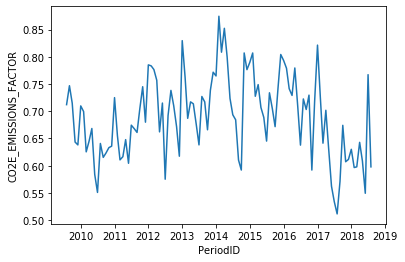

In [18]:
plt.figure(figsize=(6,4))
sns.lineplot(df_resample.index, df_resample.CO2E_EMISSIONS_FACTOR);

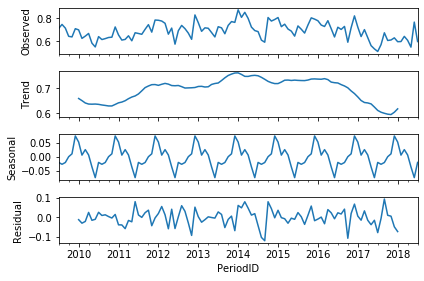

In [15]:
result = seasonal_decompose(df_resample.CO2E_EMISSIONS_FACTOR, model='additive')
result.plot();

In [17]:
result.seasonal

PeriodID
2009-07-31    0.969519
2009-08-31    0.962052
2009-09-30    0.975313
2009-10-31    1.000791
2009-11-30    1.015596
                ...   
2018-03-31    1.036612
2018-04-30    1.009544
2018-05-31    0.946352
2018-06-30    0.891800
2018-07-31    0.969519
Freq: M, Name: CO2E_EMISSIONS_FACTOR, Length: 109, dtype: float64

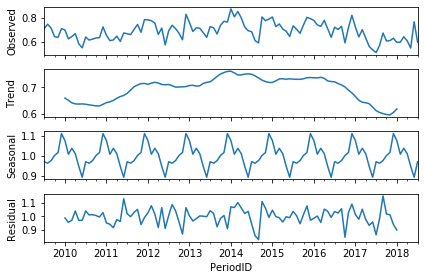

In [16]:
result = seasonal_decompose(df_resample.CO2E_EMISSIONS_FACTOR, model='multiplicative')
result.plot();